In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
import time
from datetime import datetime
from numpy.random import seed
seed(1) # Fixing random seed for reproducibility

Loading Data and Image Processing

In [6]:
# dimensions of our images
img_width, img_height = 100, 100   

# Relative directory paths
train_data_dir = 'Data/Train'
validation_data_dir = 'Data/Validation'

#Check for image format
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

#Rescale all images for training & Apply data augmentation for better training performance
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rescale = 1. / 255,
    shear_range = 0.2,
    zoom_range = 0.2)

#Rescale my images for voldiation. Data augementation should not be applied to validation dataset
test_datagen = ImageDataGenerator(rescale=1. / 255)

batch_size = 32
#Generate the scaling and data augmentation to the training dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

#Generate the scaling to the test dataset
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

Found 1600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


Model Architecture

In [7]:
#Develop the CNN Architecture
#HINT: Start with 2 sets of (Convolutional (relu activation) and Max. Pooling layers (2,2 size)), and 3 Dense layers
input_shape = (batch_size,img_height,img_width,3)
model = Sequential(
    [
        Conv2D(32,kernel_size=(7,7),activation="relu",input_shape=input_shape[1:], name="layer1"),
        MaxPooling2D(pool_size=(2,2),name="layer2"),
        Conv2D(64,kernel_size=(7,7),activation="relu",input_shape=input_shape[1:], name="layer3"),
        MaxPooling2D(pool_size=(2,2),name="layer4"),
        Conv2D(64,kernel_size=(5,5),activation="relu",input_shape=input_shape[1:], name="layer5"),
        MaxPooling2D(pool_size=(2,2),name="layer6"),
        Flatten(name="layer7"), 
        Flatten(name="layer8"), 
        Dense(64, activation="relu", name="layer9"),
        Dropout(0.2, name="layer10"),
        Dense(10, activation="relu", name="layer11"),
        Dropout(0.2, name="layer12"),
        Dense(4, activation="softmax", name="layer13"),
    ]
)
opt = keras.optimizers.Adam(learning_rate=0.001)
#Compile model with loss function, optimizer, and target metrics
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model Training

In [8]:
#Training & Validation dataset sizes
nb_train_samples = 1600
nb_validation_samples = 800

#Model hyperparameter
epochs = 20

#Attain summary of the model
model.summary()

#Training the Neural Network Architecture (Need to define the "model" when creating the architecture)
history = model.fit_generator(
          train_generator, #Uses the augmented train data generated
          steps_per_epoch = nb_train_samples // batch_size, #Training steps taken per epoch
          epochs = epochs, #Total number of epochs defined
          validation_data = validation_generator, #Uses the scaled validation data
          validation_steps = nb_validation_samples // batch_size) #Validation steps taken per epoch

#Save model (Saves Architecture and Weights)
model.save('saved_trained_models/trained_model_{0}.h5'.format(datetime.today().strftime("%Y-%m-%d"))) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Conv2D)             (None, 94, 94, 32)        4736      
                                                                 
 layer2 (MaxPooling2D)       (None, 47, 47, 32)        0         
                                                                 
 layer3 (Conv2D)             (None, 41, 41, 64)        100416    
                                                                 
 layer4 (MaxPooling2D)       (None, 20, 20, 64)        0         
                                                                 
 layer5 (Conv2D)             (None, 16, 16, 64)        102464    
                                                                 
 layer6 (MaxPooling2D)       (None, 8, 8, 64)          0         
                                                                 
 layer7 (Flatten)            (None, 4096)              0

C:\Users\mo112\AppData\Local\Temp\ipykernel_31000\3016212894.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
50/50 [==============================] - 99s 2s/step - loss: 1.2632 - accuracy: 0.3694 - val_loss: 0.8243 - val_accuracy: 0.5000
Epoch 2/20
50/50 [==============================] - 83s 2s/step - loss: 0.7599 - accuracy: 0.6056 - val_loss: 0.5039 - val_accuracy: 0.8338
Epoch 3/20
50/50 [==============================] - 93s 2s/step - loss: 0.5116 - accuracy: 0.7113 - val_loss: 0.3872 - val_accuracy: 0.7500
Epoch 4/20
50/50 [==============================] - 94s 2s/step - loss: 0.7811 - accuracy: 0.6363 - val_loss: 0.5641 - val_accuracy: 0.7500
Epoch 5/20
50/50 [==============================] - 94s 2s/step - loss: 0.4716 - accuracy: 0.7206 - val_loss: 0.3728 - val_accuracy: 0.7500
Epoch 6/20
50/50 [==============================] - 99s 2s/step - loss: 0.4130 - accuracy: 0.7325 - val_loss: 0.3489 - val_accuracy: 0.9550
Epoch 7/20
50/50 [==============================] - 88s 2s/step - loss: 0.6342 - accuracy: 0.6600 - val_loss: 0.5849 - val_accuracy: 0.5512
Epoch 8/20
50/50 [==

Plotting Performance: Accuracy and Loss of Trainning and Validation

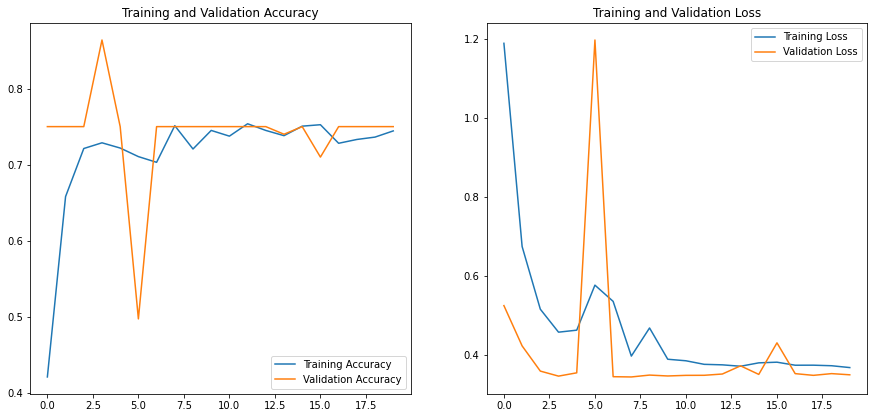

In [ ]:
#Extract the accuracy and loss for both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()